##Problem Statement:-

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##The company wants to get from us:-

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

##Target :-

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#Python Codings:--

##Step 1st:- Reading the Data

In [7]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [4]:
#import the useful libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Setting the options to display max rows and max columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

#Setting the options to convert scientific notations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format

In [5]:
bb = pd.read_csv("day.csv")

In [6]:
bb.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit    temp   atemp     hum  windspeed  casual  registered   cnt  
0           2 14.1108 18.1812 80.5833    10.7499     331         654   985  
1           2 14.9026 17.6869 69.6087    16.6521     131         670   801  
2           1  8.0509  9.4703 43.7273    16.6367     120        1229  1349  
3           1  8.2000 10.6061 59.0435    10.7398     108        1454  1562  
4           1  9.3052 11.4635 43.6957    12.5223      82        1518  1600

In [8]:
bb.shape

(730, 16)

In [9]:
bb.describe()

instant   season       yr     mnth  holiday  weekday  workingday  \
count 730.0000 730.0000 730.0000 730.0000 730.0000 730.0000    730.0000   
mean  365.5000   2.4986   0.5000   6.5260   0.0288   2.9959      0.6904   
std   210.8771   1.1102   0.5003   3.4502   0.1673   2.0003      0.4626   
min     1.0000   1.0000   0.0000   1.0000   0.0000   0.0000      0.0000   
25%   183.2500   2.0000   0.0000   4.0000   0.0000   1.0000      0.0000   
50%   365.5000   3.0000   0.5000   7.0000   0.0000   3.0000      1.0000   
75%   547.7500   3.0000   1.0000  10.0000   0.0000   5.0000      1.0000   
max   730.0000   4.0000   1.0000  12.0000   1.0000   6.0000      1.0000   

       weathersit     temp    atemp      hum  windspeed    casual  registered  \
count    730.0000 730.0000 730.0000 730.0000   730.0000  730.0000    730.0000   
mean       1.3945  20.3193  23.7263  62.7652    12.7636  849.2493   3658.7575   
std        0.5448   7.5067   8.1503  14.2376     5.1958  686.4799   1559.7587   
min        1.0000   2.4243   3.9535   0.0000     1.5002    2.0000     20.0000   
25%        1.0000  13.8119  16.8897  52.0000     9.0417  316.2500   2502.2500   
50%        1.0000  20.4658  24.3682  62.6250    12.1253  717.0000   3664.5000   
75%        2.0000  26.8806  30.4458  72.9896    15.6256 1096.5000   4783.2500   
max        3.0000  35.3283  42.0448  97.2500    34.0000 3410.0000   6946.0000   

            cnt  
count  730.0000  
mean  4508.0068  
std   1936.0116  
min     22.0000  
25%   3169.7500  
50%   4548.5000  
75%   5966.0000  
max   8714.0000

In [10]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
#Droping the instant column as it is just having index number of the dataset:-
bb.drop(['instant'],axis=1,inplace=True)

In [12]:
#We already have weekday month columns hence we can just drop the dteday column:
bb.drop(['dteday'],axis=1,inplace=True)

In [13]:
bb.head()

season  yr  mnth  holiday  weekday  workingday  weathersit    temp   atemp  \
0       1   0     1        0        1           1           2 14.1108 18.1812   
1       1   0     1        0        2           1           2 14.9026 17.6869   
2       1   0     1        0        3           1           1  8.0509  9.4703   
3       1   0     1        0        4           1           1  8.2000 10.6061   
4       1   0     1        0        5           1           1  9.3052 11.4635   

      hum  windspeed  casual  registered   cnt  
0 80.5833    10.7499     331         654   985  
1 69.6087    16.6521     131         670   801  
2 43.7273    16.6367     120        1229  1349  
3 59.0435    10.7398     108        1454  1562  
4 43.6957    12.5223      82        1518  1600

##Step 2nd:- Visualising and Understanding the Data

###Creating a function to find the total null count and null percentage

In [14]:
def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [15]:
find_NaN(bb)

Cnt_of_Nulls  Null_Percentage
season                 0           0.0000
yr                     0           0.0000
mnth                   0           0.0000
holiday                0           0.0000
weekday                0           0.0000
workingday             0           0.0000
weathersit             0           0.0000
temp                   0           0.0000
atemp                  0           0.0000
hum                    0           0.0000
windspeed              0           0.0000
casual                 0           0.0000
registered             0           0.0000
cnt                    0           0.0000

##Visualising Numeric Variables:-

In [16]:
#First Define Function Univariate.
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        plt.show()

##Analysis on Column:- cnt

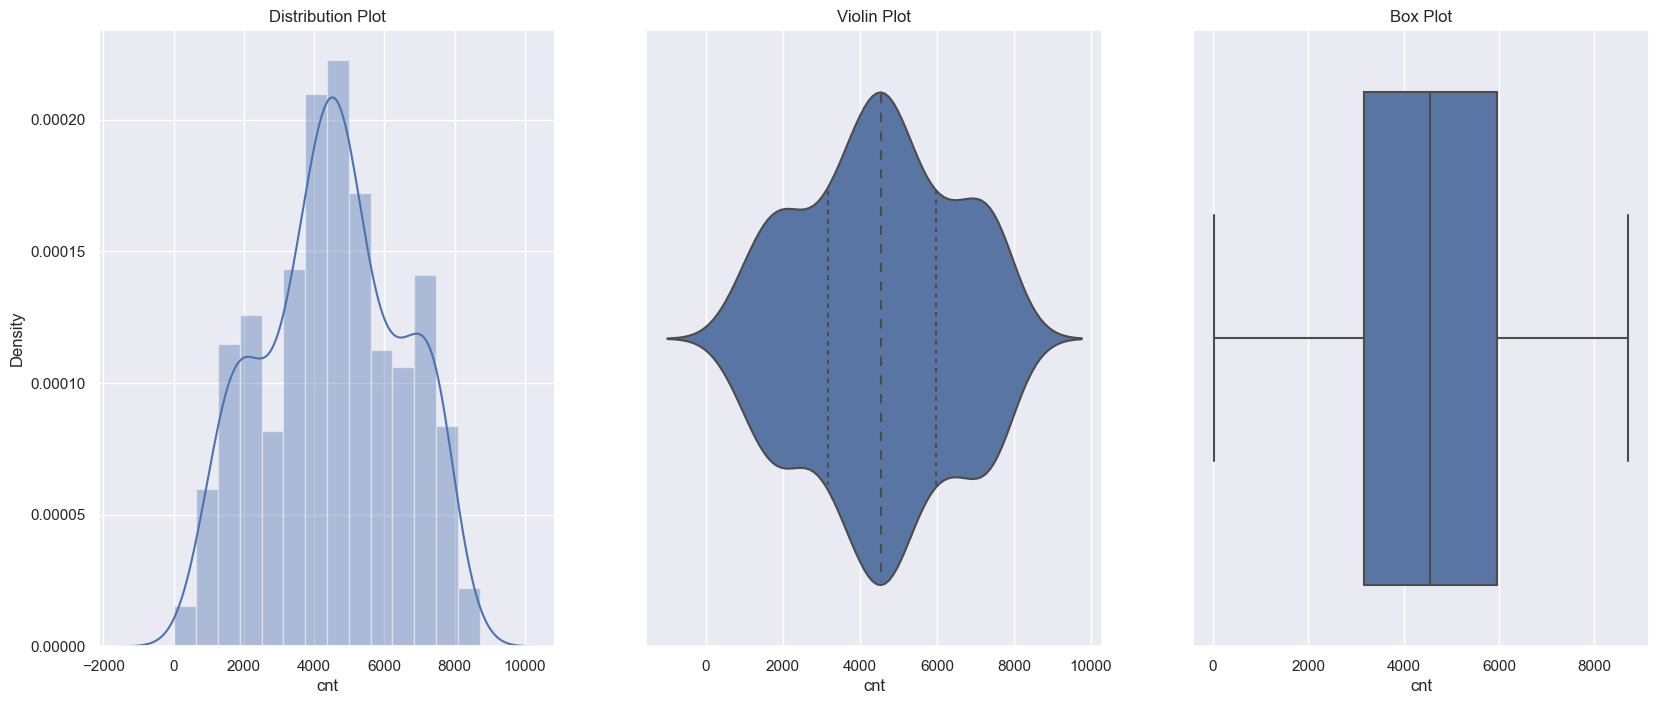

In [17]:
#Lets carry out Univariate analysis on cnt
univariate(df=bb,col='cnt')

##Inference - Data is normally distributed bet ween 0 to 10000, mean is 4500

In [18]:
# The target variable(cnt) is the sum of the both registered and casual columns, 
# So these columns are not usefull to predict target variable we can drop these columns
# Also to avoid multicollinearity we delete the columns 'casual' and 'registered':
bb.drop(['casual','registered'],axis=1,inplace=True)

##Analysis on Column:- windspeed

In [19]:
#Now carry out Univariate analysis on windspeed
univariate(df=bb,col='windspeed')

##Inference - windspeed column is normally distributed between 1 to 30 with mean of 12

##Analysis on Column:- hum

In [20]:
bb.head(1)

season  yr  mnth  holiday  weekday  workingday  weathersit    temp   atemp  \
0       1   0     1        0        1           1           2 14.1108 18.1812   

      hum  windspeed  cnt  
0 80.5833    10.7499  985

In [21]:
#Now carry out Univariate analysis on hum-
univariate(df=bb,col='hum')

##Inference - humudity column data is right skewed normal distribution with mean of 62

##Analysis on Column:- atemp & temp

In [22]:
sns.pairplot(bb[['temp','atemp']])
plt.show()

##Inference - Predictor columns temp and atemp are very much correlated to each other, so we can drop any one of them, here we are dropping atemp variable.

In [23]:
#Now Droping the atemp variable:-
bb.drop(['atemp'],axis=1,inplace=True)

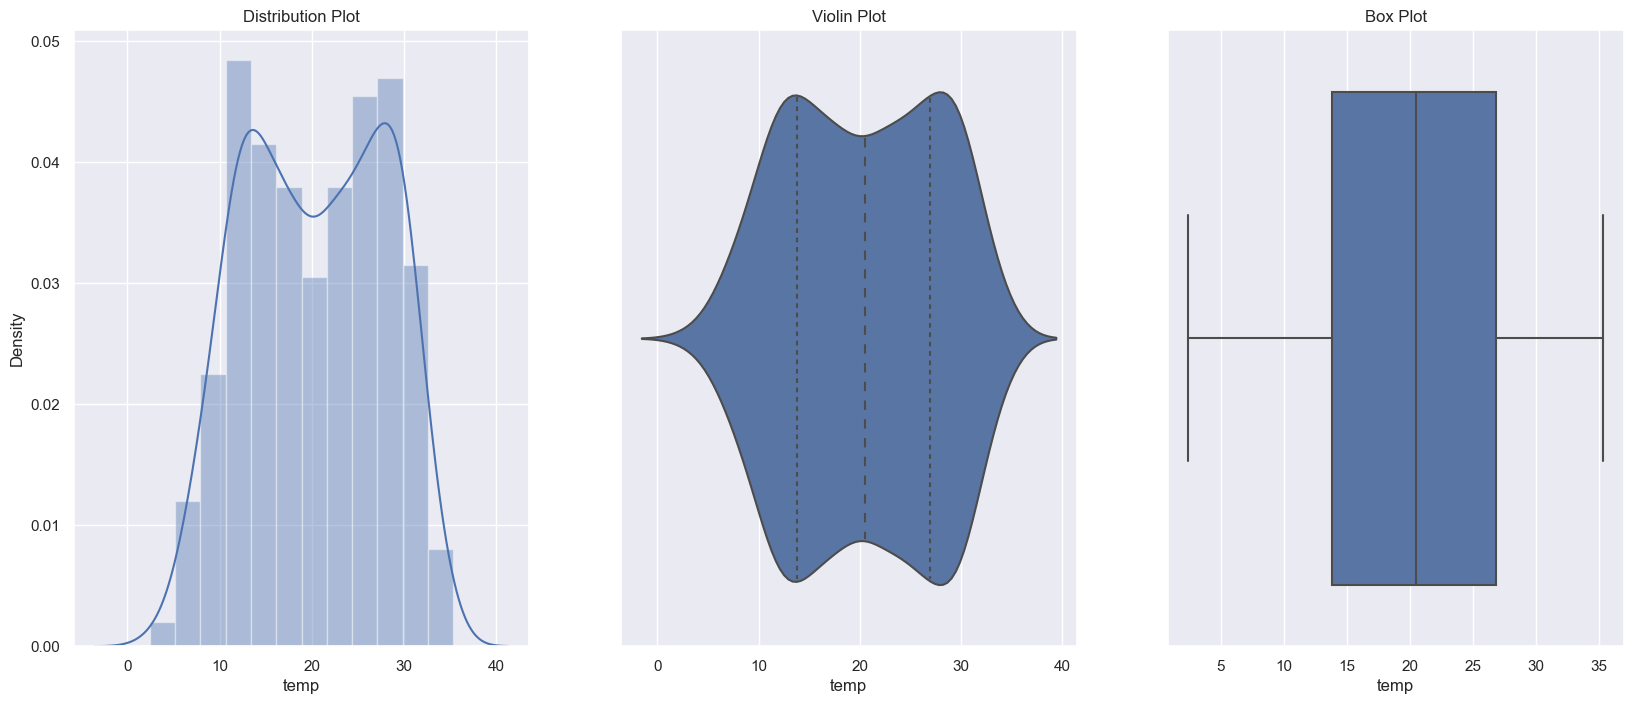

In [24]:
#Now carry out Univariate analysis on temp
univariate(df=bb,col='temp')

##Inference - temp column data is right skewed normal distribution with mean of 20

##Correlation Matrix and Heat Map:-

In [25]:
bb.head()

season  yr  mnth  holiday  weekday  workingday  weathersit    temp     hum  \
0       1   0     1        0        1           1           2 14.1108 80.5833   
1       1   0     1        0        2           1           2 14.9026 69.6087   
2       1   0     1        0        3           1           1  8.0509 43.7273   
3       1   0     1        0        4           1           1  8.2000 59.0435   
4       1   0     1        0        5           1           1  9.3052 43.6957   

   windspeed   cnt  
0    10.7499   985  
1    16.6521   801  
2    16.6367  1349  
3    10.7398  1562  
4    12.5223  1600

In [26]:
sns.pairplot(bb[['temp','hum','windspeed','cnt']])
plt.show()

In [27]:
corr_df= bb[['temp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

##Q3.) Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
##Ans.) By looking at the pair plot temp variable has the highest (0.63) correlation with target variable 'cnt'.

##Visualising Categorical  Variables:-

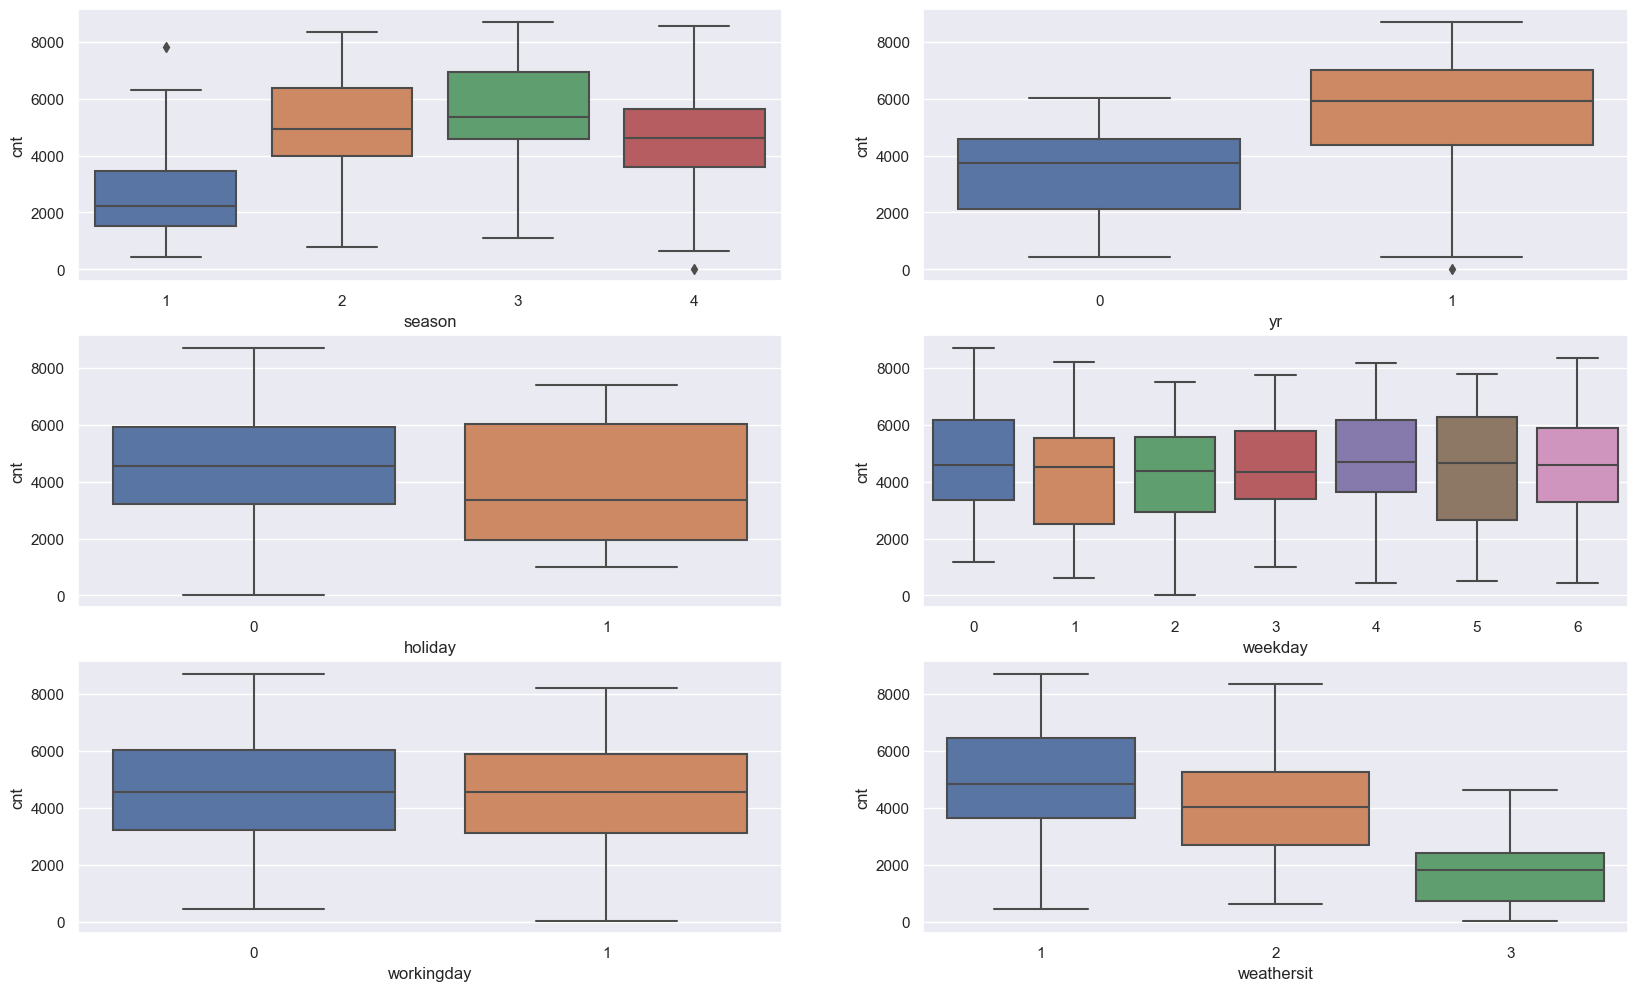

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bb)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bb)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bb)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bb)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bb)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bb)
plt.show()

In [29]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = bb)
plt.show()

###Q1.) From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?
Answer :Observations from above boxplots for categorical variables: 
        The year box plots indicates that more bikes are rent during 2019.
        The season box plots indicates that more bikes are rent during fall season.
        The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.
        The month box plots indicates that more bikes are rent during september month.
        The weekday box plots indicates that more bikes are rent during saturday.
        The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.

In [30]:
bb.head()

season  yr  mnth  holiday  weekday  workingday  weathersit    temp     hum  \
0       1   0     1        0        1           1           2 14.1108 80.5833   
1       1   0     1        0        2           1           2 14.9026 69.6087   
2       1   0     1        0        3           1           1  8.0509 43.7273   
3       1   0     1        0        4           1           1  8.2000 59.0435   
4       1   0     1        0        5           1           1  9.3052 43.6957   

   windspeed   cnt  
0    10.7499   985  
1    16.6521   801  
2    16.6367  1349  
3    10.7398  1562  
4    12.5223  1600

In [31]:
bb.shape

(730, 11)

##Step 3rd:- Data Preparation:-

In [32]:
bb.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [33]:
def ass_season(x):
    if x == 1:
        return 'spring'
    elif x == 2 :
        return 'summer'
    elif x == 3 :
        return 'fall'
    else:
        return 'winter'
    
bb['season'] = bb['season'].apply(ass_season)

In [34]:
bb.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [35]:
bb.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [36]:
def ass_month(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'})

bb['mnth']=bb[['mnth']].apply(ass_month)

In [37]:
bb.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [38]:
bb.head(2)

season  yr mnth  holiday  weekday  workingday  weathersit    temp     hum  \
0  spring   0  Jan        0        1           1           2 14.1108 80.5833   
1  spring   0  Jan        0        2           1           2 14.9026 69.6087   

   windspeed  cnt  
0    10.7499  985  
1    16.6521  801

In [39]:
def ass_year(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

bb['yr'] = bb['yr'].apply(ass_year)

In [40]:
bb.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [41]:
def ass_weekday(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bb['weekday']=bb[['weekday']].apply(ass_weekday)

In [42]:
bb.weekday.value_counts()

Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: weekday, dtype: int64

In [43]:
def ass_weather(x):
    return x.map({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})

bb['weathersit']= bb[['weathersit']].apply(ass_weather)

In [44]:
bb.weathersit.value_counts()

Clear          463
Mist_Cloudy    246
Light_Snow      21
Name: weathersit, dtype: int64

In [45]:
bb.head()

season    yr mnth  holiday weekday  workingday   weathersit    temp  \
0  spring  2018  Jan        0     Mon           1  Mist_Cloudy 14.1108   
1  spring  2018  Jan        0     Tue           1  Mist_Cloudy 14.9026   
2  spring  2018  Jan        0     Wed           1        Clear  8.0509   
3  spring  2018  Jan        0     Thu           1        Clear  8.2000   
4  spring  2018  Jan        0     Fri           1        Clear  9.3052   

      hum  windspeed   cnt  
0 80.5833    10.7499   985  
1 69.6087    16.6521   801  
2 43.7273    16.6367  1349  
3 59.0435    10.7398  1562  
4 43.6957    12.5223  1600

###Now Creating Dummy Variables:-

#We can create dummy variables on categorical variables season,yr, mnth, weekday, and weathersit...

In [46]:
bb=pd.get_dummies(data=bb, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)

In [47]:
bb.head()

holiday  workingday    temp     hum  windspeed   cnt  season_spring  \
0        0           1 14.1108 80.5833    10.7499   985              1   
1        0           1 14.9026 69.6087    16.6521   801              1   
2        0           1  8.0509 43.7273    16.6367  1349              1   
3        0           1  8.2000 59.0435    10.7398  1562              1   
4        0           1  9.3052 43.6957    12.5223  1600              1   

   season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  \
0              0              0         0         0         0         1   
1              0              0         0         0         0         1   
2              0              0         0         0         0         1   
3              0              0         0         0         0         1   
4              0              0         0         0         0         1   

   mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   yr_2019  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0        0            1            0            0            0            0   
1        0            0            0            0            0            1   
2        0            0            0            0            0            0   
3        0            0            0            0            1            0   
4        0            0            0            0            0            0   

   weekday_Wed  weathersit_Light_Snow  weathersit_Mist_Cloudy  
0            0                      0                       1  
1            0                      0                       1  
2            1                      0                       0  
3            0                      0                       0  
4            0                      0                       0

In [48]:
bb.shape

(730, 29)

##Step 4th: Splitting the Data into Training and Testing Sets:-

#Now Split the dataset to train and test data :-

In [49]:
np.random.seed(0)
bb_train, bb_test = train_test_split(bb, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
#now checking shape of train and test dataframe-
print("Train dataframe : ",bb_train.shape)
print("Test dataframe : ",bb_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


##Re-scale the numerical features using the Standard Scaler:-

#Now if we observe windspeed, hum,temp and cnt have larger integer values, we can rescale the variables so that they have a comparable scale...

In [52]:
scaler = StandardScaler()

In [53]:
#We can apply scaller to all columns except dummy variables-
scale_columns=['cnt','temp','hum','windspeed']
bb_train[scale_columns] = scaler.fit_transform(bb_train[scale_columns])

In [54]:
bb_train.head()

holiday  workingday    temp     hum  windspeed     cnt  season_spring  \
653        0           1 -0.1213 -0.5147    -0.1178  1.5627              0   
576        0           1  1.2317  0.5164    -0.3306  1.3996              0   
426        0           0 -0.4205 -0.0699    -0.3857 -0.2156              1   
728        0           1 -1.2949 -1.0450     2.0181 -1.3795              1   
482        0           0 -0.6276 -1.0008    -0.7799 -0.1366              0   

     season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  \
653              0              1         0         0         0         0   
576              0              0         0         0         0         0   
426              0              0         0         0         0         0   
728              0              0         0         1         0         0   
482              1              0         0         0         0         0   

     mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
653         0         0         0         0         0         1         0   
576         1         0         0         0         0         0         0   
426         0         0         1         0         0         0         0   
728         0         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   

     yr_2019  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653        1            0            0            0            0            0   
576        1            0            0            0            0            0   
426        1            0            0            1            0            0   
728        1            1            0            0            0            0   
482        1            0            0            1            0            0   

     weekday_Wed  weathersit_Light_Snow  weathersit_Mist_Cloudy  
653            1                      0                       0  
576            1                      0                       0  
426            0                      0                       1  
728            0                      0                       0  
482            0                      0                       1

In [55]:
bb_train.describe()

holiday  workingday     temp      hum  windspeed      cnt  \
count 510.0000    510.0000 510.0000 510.0000   510.0000 510.0000   
mean    0.0255      0.7118  -0.0000  -0.0000    -0.0000  -0.0000   
std     0.1578      0.4534   1.0010   1.0010     1.0010   1.0010   
min     0.0000      0.0000  -2.3812  -4.4626    -1.8910  -2.2891   
25%     0.0000      0.0000  -0.8750  -0.7666    -0.7168  -0.7006   
50%     0.0000      1.0000   0.0144   0.0229    -0.1415   0.0224   
75%     0.0000      1.0000   0.8774   0.7168     0.5523   0.7625   
max     1.0000      1.0000   2.0509   2.3990     4.0042   2.1677   

       season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
count       510.0000       510.0000       510.0000  510.0000  510.0000   
mean          0.2431         0.2451         0.2490    0.0961    0.0843   
std           0.4294         0.4306         0.4329    0.2950    0.2781   
min           0.0000         0.0000         0.0000    0.0000    0.0000   
25%           0.0000         0.0000         0.0000    0.0000    0.0000   
50%           0.0000         0.0000         0.0000    0.0000    0.0000   
75%           0.0000         0.0000         0.0000    0.0000    0.0000   
max           1.0000         1.0000         1.0000    1.0000    1.0000   

       mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
count  510.0000  510.0000  510.0000  510.0000  510.0000  510.0000  510.0000   
mean     0.0667    0.0882    0.0765    0.0745    0.0980    0.0843    0.0863   
std      0.2497    0.2839    0.2660    0.2629    0.2977    0.2781    0.2810   
min      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
25%      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
50%      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
75%      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
max      1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000   

       mnth_Oct  mnth_Sep  yr_2019  weekday_Mon  weekday_Sat  weekday_Sun  \
count  510.0000  510.0000 510.0000     510.0000     510.0000     510.0000   
mean     0.0863    0.0804   0.5078       0.1549       0.1294       0.1373   
std      0.2810    0.2722   0.5004       0.3622       0.3360       0.3445   
min      0.0000    0.0000   0.0000       0.0000       0.0000       0.0000   
25%      0.0000    0.0000   0.0000       0.0000       0.0000       0.0000   
50%      0.0000    0.0000   1.0000       0.0000       0.0000       0.0000   
75%      0.0000    0.0000   1.0000       0.0000       0.0000       0.0000   
max      1.0000    1.0000   1.0000       1.0000       1.0000       1.0000   

       weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_Snow  \
count     510.0000     510.0000     510.0000               510.0000   
mean        0.1431       0.1529       0.1353                 0.0294   
std         0.3506       0.3603       0.3424                 0.1691   
min         0.0000       0.0000       0.0000                 0.0000   
25%         0.0000       0.0000       0.0000                 0.0000   
50%         0.0000       0.0000       0.0000                 0.0000   
75%         0.0000       0.0000       0.0000                 0.0000   
max         1.0000       1.0000       1.0000                 1.0000   

       weathersit_Mist_Cloudy  
count                510.0000  
mean                   0.3431  
std                    0.4752  
min                    0.0000  
25%                    0.0000  
50%                    0.0000  
75%                    1.0000  
max                    1.0000

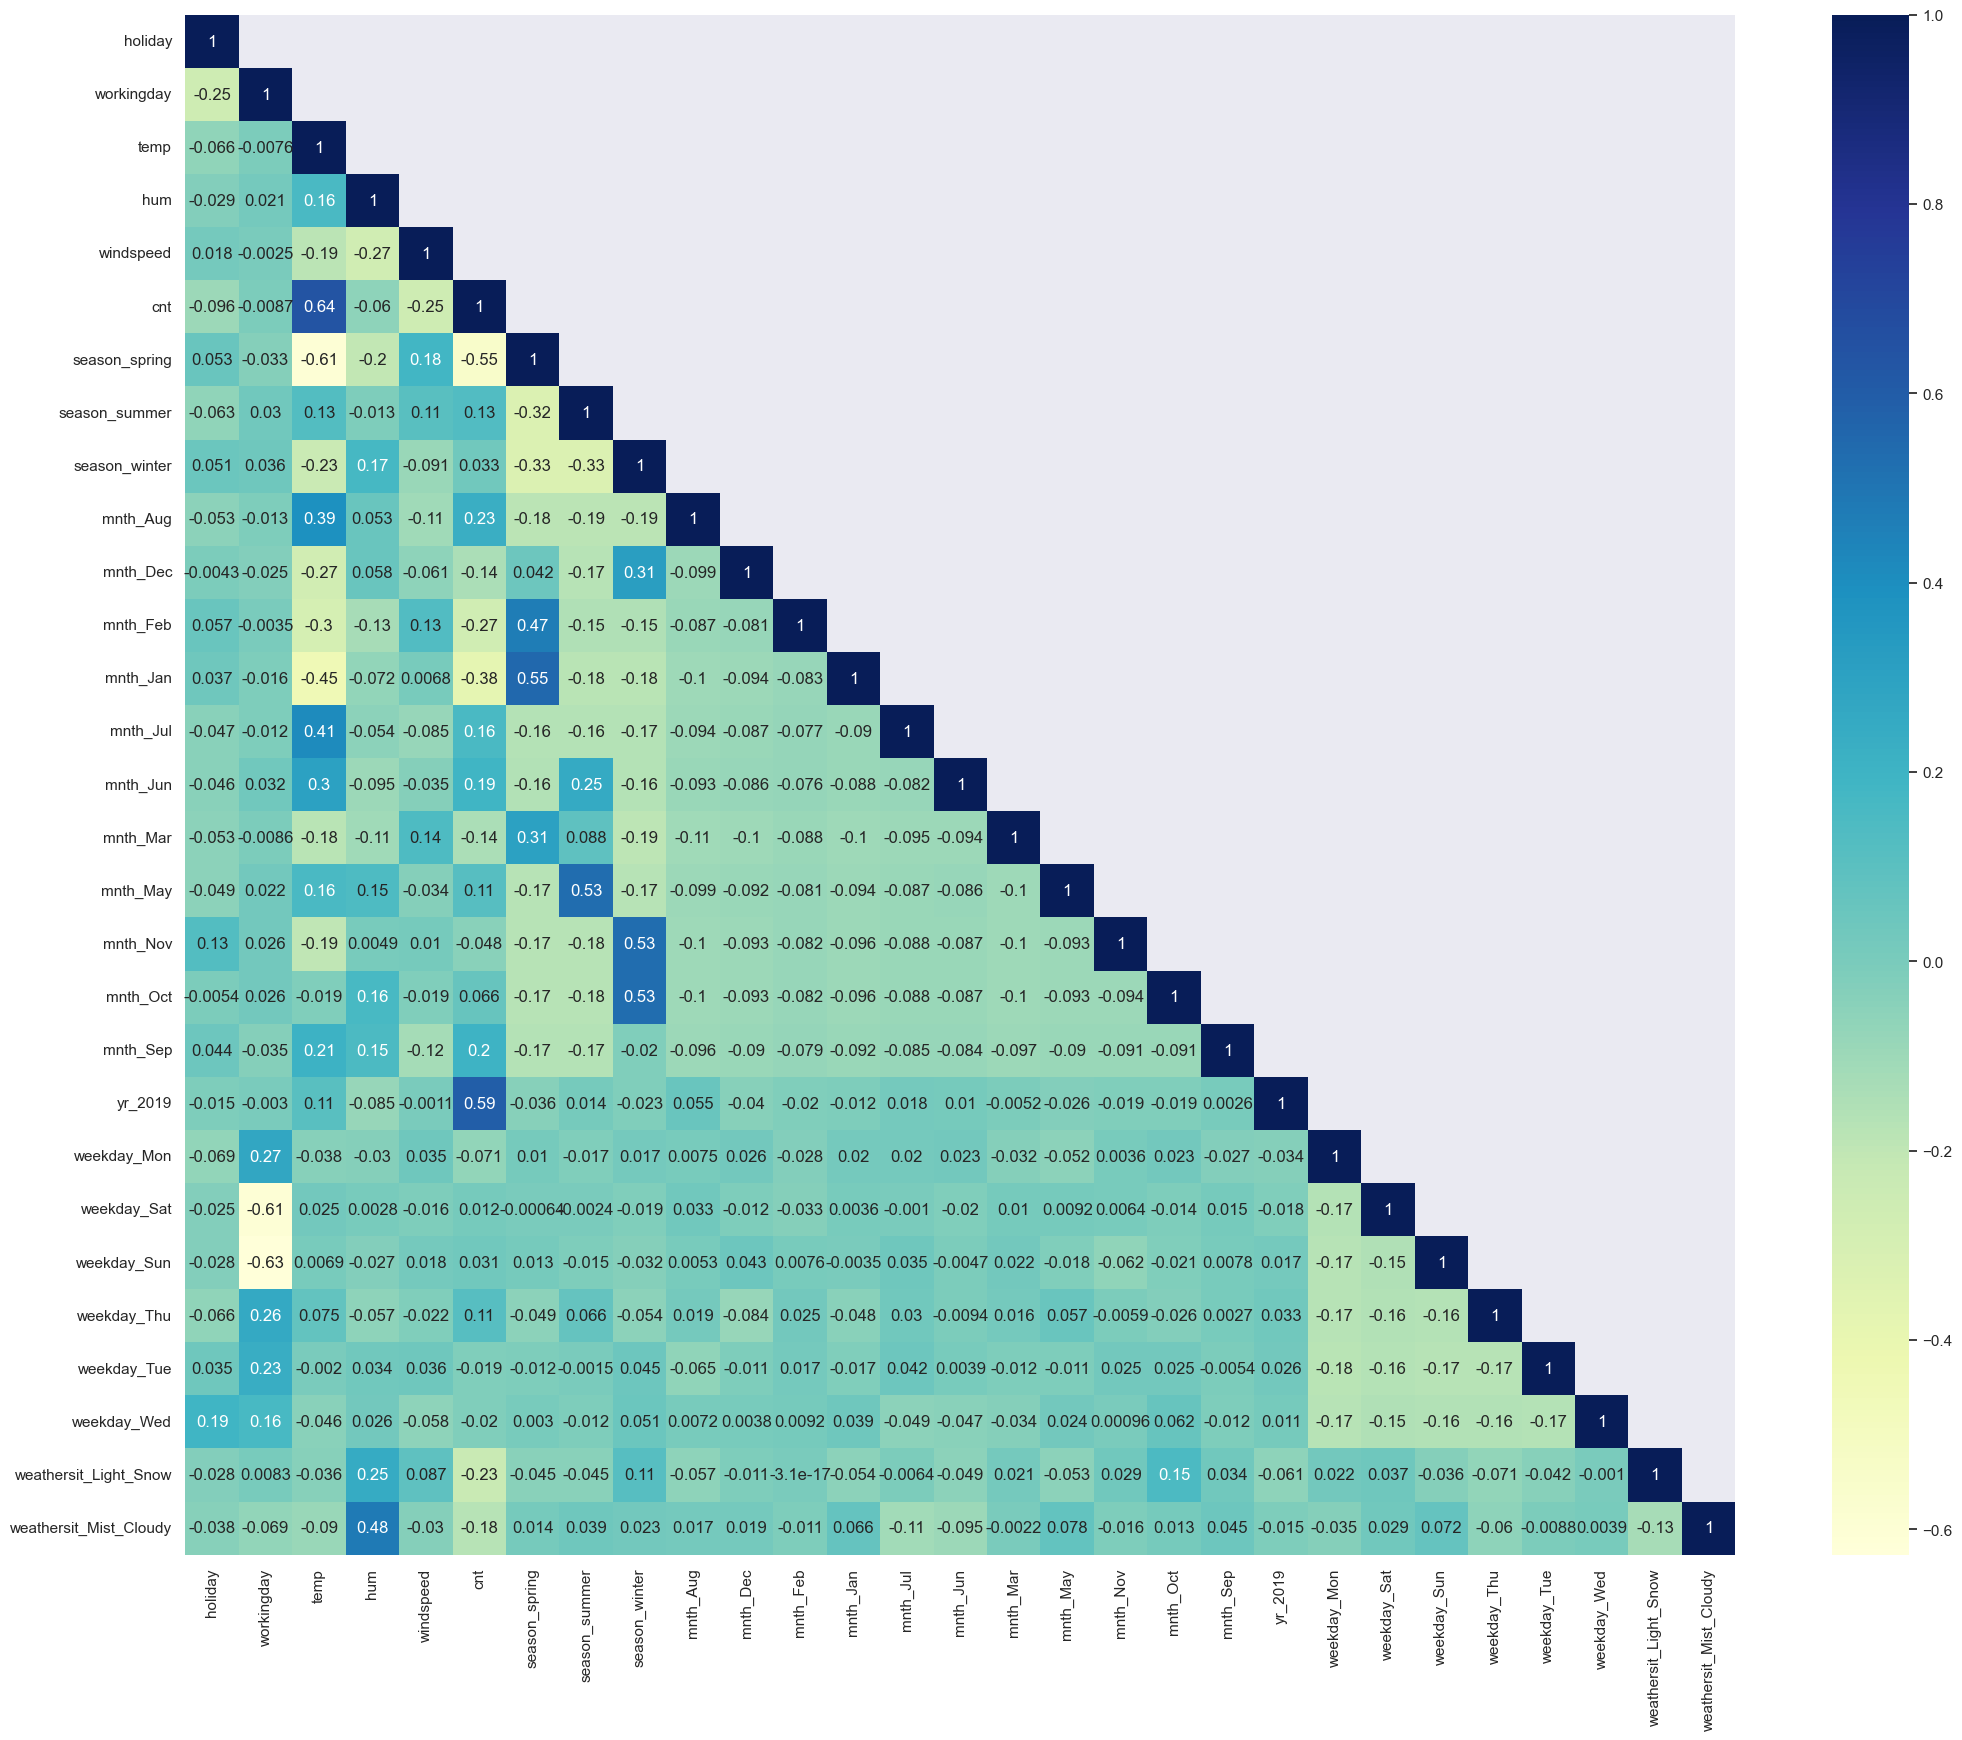

In [56]:
#Now we can plot correlation matrix for bb_train data-
mask=np.array(bb_train.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (25, 20))
sns.heatmap(bb_train.corr(), mask=mask, annot = True, cmap="YlGnBu")
plt.show()

##now if we observe temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt..

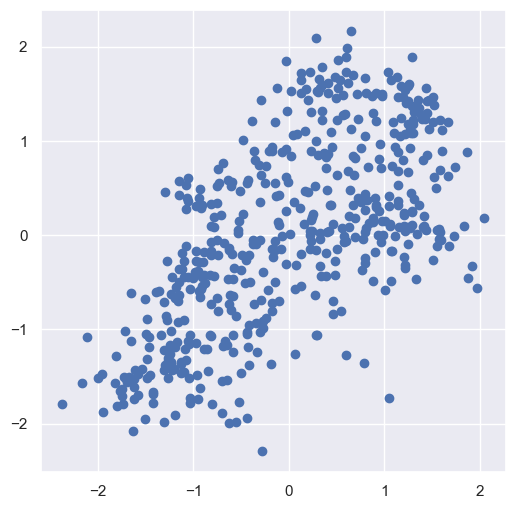

In [58]:
plt.figure(figsize=[6,6])
plt.scatter(bb_train.temp, bb_train.cnt)
plt.show()

##Inference - So, we pick temp as the first variable and we'll try to fit a regression line to that.

#Now dividing data into X & Y sets for the model building..

In [59]:
y_train = bb_train.pop('cnt')
X_train = bb_train

In [60]:
X_train.shape

(510, 28)

In [61]:
y_train.shape

(510,)

##Step 5th:- Building a linear model:-

#Now fit a regression line using statsmodels...

In [62]:
# first add a constant-
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model..
lr = sm.OLS(y_train, X_train_lm).fit()

In [63]:
# Check the parameters obtained
lr.params

const                    -0.1817
holiday                  -0.6036
workingday               -0.2697
temp                      0.4479
hum                      -0.1022
windspeed                -0.1384
season_spring            -0.1948
season_summer             0.1883
season_winter             0.4943
mnth_Aug                  0.0959
mnth_Dec                 -0.2035
mnth_Feb                 -0.1661
mnth_Jan                 -0.2835
mnth_Jul                 -0.1556
mnth_Jun                  0.0043
mnth_Mar                  0.0027
mnth_May                  0.1073
mnth_Nov                 -0.1852
mnth_Oct                  0.0258
mnth_Sep                  0.3835
yr_2019                   1.0289
weekday_Mon              -0.1098
weekday_Sat              -0.2510
weekday_Sun              -0.2227
weekday_Thu               0.0172
weekday_Tue              -0.1172
weekday_Wed              -0.0501
weathersit_Light_Snow    -1.1210
weathersit_Mist_Cloudy   -0.2645
dtype: float64

In [64]:
# Now print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.33e-179
Time:                        23:26:46   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             534.7
Df Residuals:                     481   BIC:                             657.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#Dropping the Variable and Updating the Model..

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 
A low p-value (< 0.05) indicates that you can reject the null hypothesis.
Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

In [66]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again.

X_train=X_train.drop('mnth_Mar', 1)

In [67]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [68]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.24e-180
Time:                        23:27:32   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             532.7
Df Residuals:                     482   BIC:                             651.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [69]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_Jun', 1)

In [70]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.08e-181
Time:                        23:27:48   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             530.7
Df Residuals:                     483   BIC:                             645.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [72]:
# We have high P value for mnth_October feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_Oct', 1)

In [73]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.90e-182
Time:                        23:28:00   Log-Likelihood:                -238.38
No. Observations:                 510   AIC:                             528.8
Df Residuals:                     484   BIC:                             638.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [75]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Thu', 1)

In [76]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.71e-183
Time:                        23:28:12   Log-Likelihood:                -238.41
No. Observations:                 510   AIC:                             526.8
Df Residuals:                     485   BIC:                             632.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [78]:
# We have high P value for weekday_Sunday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_Sun', 1)

In [79]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [80]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.37e-184
Time:                        23:28:23   Log-Likelihood:                -238.70
No. Observations:                 510   AIC:                             525.4
Df Residuals:                     486   BIC:                             627.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [81]:
#Now calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1               workingday 6.6300
5            season_spring 5.2300
2                     temp 4.3300
7            season_winter 3.7400
6            season_summer 3.3400
11                mnth_Jan 2.5500
22  weathersit_Mist_Cloudy 2.3100
16                 yr_2019 2.0900
8                 mnth_Aug 2.0400
10                mnth_Feb 1.9800
12                mnth_Jul 1.9500
14                mnth_Nov 1.9500
3                      hum 1.8900
18             weekday_Sat 1.7800
9                 mnth_Dec 1.7200
13                mnth_May 1.6600
17             weekday_Mon 1.5500
19             weekday_Tue 1.5500
20             weekday_Wed 1.5300
15                mnth_Sep 1.4900
0                  holiday 1.3000
21   weathersit_Light_Snow 1.2900
4                windspeed 1.2200

##The variable workingday has a significantly high VIF (6.63) and a high p-value (0.457) as well. so this variable is not of much use and should be dropped...

In [82]:
X_train=X_train.drop('workingday', 1)

In [83]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [84]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.06e-185
Time:                        23:29:30   Log-Likelihood:                -238.99
No. Observations:                 510   AIC:                             524.0
Df Residuals:                     487   BIC:                             621.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [85]:
# We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_Sat', 1)

In [86]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [87]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.36e-186
Time:                        23:29:42   Log-Likelihood:                -238.99
No. Observations:                 510   AIC:                             522.0
Df Residuals:                     488   BIC:                             615.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [88]:
# We have high P value for mnth_August feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_Aug', 1)

In [89]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.05e-187
Time:                        23:29:54   Log-Likelihood:                -239.33
No. Observations:                 510   AIC:                             520.7
Df Residuals:                     489   BIC:                             609.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [91]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Wed', 1)

In [92]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          8.12e-188
Time:                        23:30:04   Log-Likelihood:                -240.04
No. Observations:                 510   AIC:                             520.1
Df Residuals:                     490   BIC:                             604.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [94]:
# We have high P value for mnth_May feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_May', 1)

In [95]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [96]:
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.44e-188
Time:                        23:30:15   Log-Likelihood:                -240.88
No. Observations:                 510   AIC:                             519.8
Df Residuals:                     491   BIC:                             600.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [97]:
# We have high P value for mnth_Feb feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_Feb', 1)

In [98]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [99]:
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.84e-189
Time:                        23:30:25   Log-Likelihood:                -242.42
No. Observations:                 510   AIC:                             520.8
Df Residuals:                     492   BIC:                             597.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [100]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4            season_spring 2.8400
1                     temp 2.8200
6            season_winter 2.7500
16  weathersit_Mist_Cloudy 2.1300
12                 yr_2019 2.0200
10                mnth_Nov 1.8400
2                      hum 1.8000
8                 mnth_Jan 1.7800
7                 mnth_Dec 1.5400
5            season_summer 1.4900
9                 mnth_Jul 1.4600
15   weathersit_Light_Snow 1.2500
14             weekday_Tue 1.2300
11                mnth_Sep 1.2100
3                windspeed 1.2100
13             weekday_Mon 1.2100
0                  holiday 1.0600

##The model lr_11 looks good because there are no features which is >0.05 and all the features VIF is less than 3.

##Step 7th:- Residual Analysis of the train data---

In [101]:
y_train_pred = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

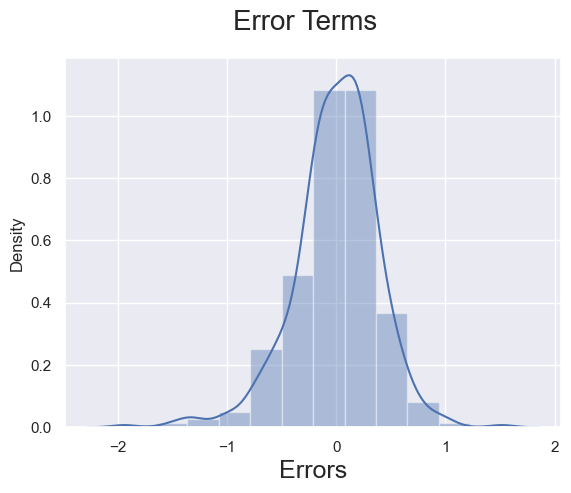

In [102]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

###Step 8th:- Making Predictions Using the Final Model---

In [103]:
num_columns=['cnt','temp','hum','windspeed']
bb_test[num_columns] = scaler.transform(bb_test[num_columns])

In [104]:
bb_test.describe()

holiday  workingday     temp      hum  windspeed      cnt  \
count 219.0000    219.0000 219.0000 219.0000   219.0000 219.0000   
mean    0.0365      0.6393   0.0961  -0.0814    -0.0437   0.0311   
std     0.1880      0.4813   1.0358   1.0222     0.9429   0.9735   
min     0.0000      0.0000  -2.1747  -2.6654    -2.1433  -2.0743   
25%     0.0000      0.0000  -0.8094  -0.8447    -0.7207  -0.6065   
50%     0.0000      1.0000   0.0950  -0.1553    -0.1256   0.0475   
75%     0.0000      1.0000   0.9832   0.6420     0.4851   0.7092   
max     1.0000      1.0000   1.9819   2.4138     2.8692   2.0042   

       season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
count       219.0000       219.0000       219.0000  219.0000  219.0000   
mean          0.2557         0.2648         0.2329    0.0594    0.0868   
std           0.4373         0.4423         0.4236    0.2368    0.2821   
min           0.0000         0.0000         0.0000    0.0000    0.0000   
25%           0.0000         0.0000         0.0000    0.0000    0.0000   
50%           0.0000         0.0000         0.0000    0.0000    0.0000   
75%           1.0000         1.0000         0.0000    0.0000    0.0000   
max           1.0000         1.0000         1.0000    1.0000    1.0000   

       mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
count  219.0000  219.0000  219.0000  219.0000  219.0000  219.0000  219.0000   
mean     0.1005    0.0776    0.1050    0.0959    0.0548    0.0868    0.0731   
std      0.3013    0.2682    0.3073    0.2951    0.2281    0.2821    0.2608   
min      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
25%      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
50%      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
75%      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
max      1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000   

       mnth_Oct  mnth_Sep  yr_2019  weekday_Mon  weekday_Sat  weekday_Sun  \
count  219.0000  219.0000 219.0000     219.0000     219.0000     219.0000   
mean     0.0822    0.0868   0.4795       0.1187       0.1735       0.1553   
std      0.2753    0.2821   0.5007       0.3242       0.3796       0.3630   
min      0.0000    0.0000   0.0000       0.0000       0.0000       0.0000   
25%      0.0000    0.0000   0.0000       0.0000       0.0000       0.0000   
50%      0.0000    0.0000   0.0000       0.0000       0.0000       0.0000   
75%      0.0000    0.0000   1.0000       0.0000       0.0000       0.0000   
max      1.0000    1.0000   1.0000       1.0000       1.0000       1.0000   

       weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_Snow  \
count     219.0000     219.0000     219.0000               219.0000   
mean        0.1416       0.1233       0.1553                 0.0274   
std         0.3494       0.3295       0.3630                 0.1636   
min         0.0000       0.0000       0.0000                 0.0000   
25%         0.0000       0.0000       0.0000                 0.0000   
50%         0.0000       0.0000       0.0000                 0.0000   
75%         0.0000       0.0000       0.0000                 0.0000   
max         1.0000       1.0000       1.0000                 1.0000   

       weathersit_Mist_Cloudy  
count                219.0000  
mean                   0.3196  
std                    0.4674  
min                    0.0000  
25%                    0.0000  
50%                    0.0000  
75%                    1.0000  
max                    1.0000

##Dividing into X_test and y_test

In [105]:
y_test = bb_test.pop('cnt')
X_test = bb_test

In [106]:
X_test.shape

(219, 28)

In [107]:
y_test.shape

(219,)

In [108]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [109]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'yr_2019', 'weekday_Mon', 'weekday_Tue',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [110]:
X_test_m.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr_2019',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [111]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mnth_Mar','mnth_Jun','mnth_Oct','weekday_Thu','weekday_Sun','workingday','weekday_Sat',
             'mnth_Aug','weekday_Wed','mnth_May','mnth_Feb']
X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [112]:
y_pred_m = lr_11.predict(X_test_m)

###Step 9th:- Model Evaluation---

##Now plot the graph for actual versus predicted values....

Text(0, 0.5, 'y_pred')

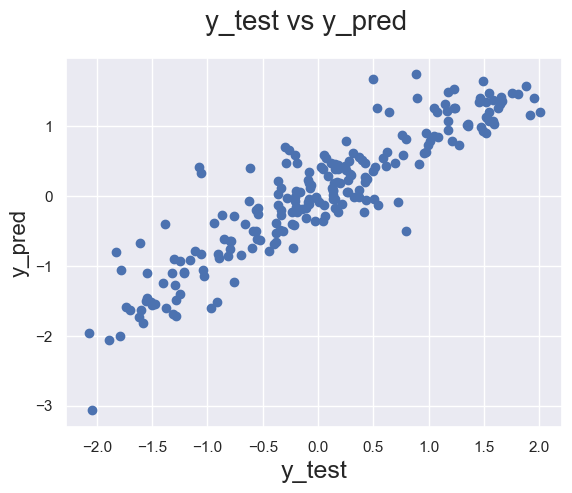

In [113]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

###R-squared score--

In [114]:
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred_m))

Train R-Score:  0.8485060124356757
Test R-Score:  0.8252119832017919


In [117]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'yr_2019', 'weekday_Mon', 'weekday_Tue',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

##Significant variables to predict the demand for shared bikes

* holiday
* temp
* hum
* windspeed
* Season(Spring,Summer,Winter)
* months(January, July, September, November, December)
* Year (2019)
* Monday and Tuesday
* weathersit( Light Snow, Mist Cloudy)

###Q5.Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?
Answer :- The Top 3 features contributing significantly towards the demands of share bikes are: 
           weathersit_Light_Snow(negative correlation).
           yr_2019(Positive correlation).
           temp(Positive correlation).